# From data lake to data warehouse

**Disclaimer**:

- Link to the [AWS academy login](https://awsacademy.instructure.com/login/canvas): [https://awsacademy.instructure.com/login/canvas](https://awsacademy.instructure.com/login/canvas)
- At the end of the lab, *remember to Stop/Destroy the created services*
    - Why?
- *Upload the Notebook to Sagemaker* (not to COLAB!)
- The second part of the lab requires PowerBI installed on your machine

**Known issues**:

- AWS classroom *does not work with Safari*
    - Solution: use Google Chrome
- [Tableau Desktop](https://www.tableau.com/products/desktop/download) *had problems on macOS* when connecting to Postgres
    - Solution: use the lab's computers

# Data lake vs Data warehouse

**Data warehouse** and **data lake** serve different needs and use cases.

A *data lake* stores relational data from business applications, and non-relational data

- The structure of the data or schema is not defined when data is captured (*schema on read*)
- You can store all of your data without careful design or the need to know what questions you might need answers 

A *data warehouse* is a database optimized to analyze relational data coming from business applications

- The data structure and schema are defined in advance to optimize for fast SQL queries (*schema on write*)
- The results are typically used for operational reporting and analysis
- Data is cleaned, enriched, and transformed so it can act as the single source of truth

# Roadmap

**Goal**: build a sub-module of a decision support system, namely a DWH to monitor historical trends of soil moisture

1. Create a data lake (AWS S3)
2. Collect and store the sensor data (manually or with AWS SageMaker)
   - *KISS*: we start with a .csv with sensor data
3. Do ETL (AWS SageMaker)
4. Build a (relational) data warehouse (AWS RDS)
5. Query the data warehouse (Tableau)

# 1. Create a data lake

Log in to the [AWS console](https://awsacademy.instructure.com/login/canvas)

:::: {.columns}
::: {.column width=30%}

![Click on `Dashbord`](https://user-images.githubusercontent.com/18005592/200340672-756adacd-bad6-4aca-b7ca-8c03ff20d928.png)

:::
::: {.column width=30%}

![Click on `Modules`](https://private-user-images.githubusercontent.com/18005592/512306914-1d16dfa2-28f1-47d3-9b1b-2b1f04c5e6cd.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTc3MzIsIm5iZiI6MTc2Mjc5NzQzMiwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMDY5MTQtMWQxNmRmYTItMjhmMS00N2QzLTliMWItMmIxZjA0YzVlNmNkLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE3NTcxMlomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTJhYjUxYjU2MzI0OTI0MTEzNjc4YjRhNGRkYWI5Y2Q5YjhmOGQwOThiNGVlNGI2YjYzYzIxYWZjYzg3OGQxZDImWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.-quaujgnirG2bjf5J0J5lZ8tg64jmZmrL7BDc-0bupI)

:::
::: {.column width=40%}

![Click on `Launch`](https://private-user-images.githubusercontent.com/18005592/512312551-7439e6e1-bfb1-4ccf-9866-71b0cd862869.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTc4MzQsIm5iZiI6MTc2Mjc5NzUzNCwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTI1NTEtNzQzOWU2ZTEtYmZiMS00Y2NmLTk4NjYtNzFiMGNkODYyODY5LnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE3NTg1NFomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTUxODA3YTJiZmFkYzY4OTJlYzZmMDg0M2Y0MGNmMjc3ZmY1NTU3NDU1OGRiZTk5Y2MxNmZlMzg3MGQ4ODY5ZGUmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.PKj93Tb-04elDGAqkZs_873gVp2WyBGQ8zv_BE8XNSU)

:::
::::

# Start the lab

![Click on `Start Lab`](https://user-images.githubusercontent.com/18005592/200342733-326a05b7-9f6e-438f-9749-1322412d7321.png)

When AWS is green (it can take 5 minutes!), click on it

![Click on `AWS`](https://private-user-images.githubusercontent.com/18005592/512312689-1a1c54e9-c4e5-462d-8290-d6c6a7e7cfe2.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTc4NjMsIm5iZiI6MTc2Mjc5NzU2MywicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTI2ODktMWExYzU0ZTktYzRlNS00NjJkLTgyOTAtZDZjNmE3ZTdjZmUyLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE3NTkyM1omWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTQxODJlOTI1ZTQwMGZmZThmMmRiOTlkZTU2NzA3MmIwZmY0N2NhYWI1ZTNiNWFlODQxYThjYjFmMDJjYzA0MWQmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.gtnKSaZc-RzPhfoOOB-GKK-JYpwE1exjSlAxHNoflQ8)

# Welcome to the AWS Console!

![AWS Console](https://private-user-images.githubusercontent.com/18005592/512312811-5ec14741-7b3d-45fc-a487-b7e5db6652c0.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTc4NzcsIm5iZiI6MTc2Mjc5NzU3NywicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTI4MTEtNWVjMTQ3NDEtN2IzZC00NWZjLWE0ODctYjdlNWRiNjY1MmMwLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE3NTkzN1omWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPWRhY2JkOWY0Njg1OTYzNzVjODlmYjVhYWIwMjhkYjllYjVmNDViN2EwNTlkODFkYTExZWI3MWMwYjAwYzMxODImWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.L_Om9h1EFWeQJ9Z_F-kLtJxbtaZT2H5vq9oW9ixEyyk)

# Data Lake

AWS Simple Storage Service (S3)

- A serverless object storage service offering industry-leading scalability, data availability, security, and performance. 
- Customers of all sizes and industries can store and protect any amount of data for virtually any use case, such as data lakes

Create two buckets

In [1]:
input_bucket = "s3://landing-raw-wateringsensors-12345678/"
output_bucket = "s3://staging-clean-wateringsensors-12345678/"

:::: {.columns}
::: {.column width=50%}

![](https://user-images.githubusercontent.com/18005592/200345832-d3522fdb-92ee-4457-8a78-5c0449af6bc4.png)

:::
::: {.column width=50%}

![](https://user-images.githubusercontent.com/18005592/200346937-410c49dc-6685-447c-9b18-4970f1954e6c.png)

:::
::::

# 2. Collect and store the sensor data (manually)

KISS: we start with a .csv with sensor data

- [http://big.csr.unibo.it/projects/nosql-datasets/watering-data-1661269649253.csv](http://big.csr.unibo.it/projects/nosql-datasets/watering-data-1661269649253.csv)

Upload it to S3 in the landing bucket

# 3. Do ETL

We need a working environment: Amazon SageMaker

- Fully managed service that provides machine learning (ML) capabilities for data scientists and developers to prepare, build, train, and deploy high-quality ML models efficiently

![SageMaker](https://private-user-images.githubusercontent.com/18005592/512312958-d837a7b9-b8bb-4293-b0c4-dc2a5378d914.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTc5MTUsIm5iZiI6MTc2Mjc5NzYxNSwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTI5NTgtZDgzN2E3YjktYjhiYi00MjkzLWIwYzQtZGMyYTUzNzhkOTE0LnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDAxNVomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTM2Nzk1YjNjM2NiODI0Y2RkNGM3MjhhMGIwZDcyOTc2YzJiNTQwOWY5YWJjYjY5MTAyMjg5NGE5MjhkOWU3ZjImWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.k0vuUTn9qIWSQDr-iS3R8eYHo2jdYSiJgSlwUi_139Y)

# Creating a notebook instance

::::{.columns}
:::{.column width=80%}
![Create a notebook instance](https://private-user-images.githubusercontent.com/18005592/512312982-497a6ea6-0f6a-4f64-aeec-ac6a349bedc4.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTc5MTUsIm5iZiI6MTc2Mjc5NzYxNSwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTI5ODItNDk3YTZlYTYtMGY2YS00ZjY0LWFlZWMtYWM2YTM0OWJlZGM0LnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDAxNVomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTI1NDdmMjA4NzIxY2FjYTI5ZGViYWQ0Y2FlNjIxM2VjZTdmMTUyYjI4NGIzNDU1NTJhMzgzNjRjMDUzYWU5NTUmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.1zrMvhZm3gYhBLLMISim5mt501dYlhTsVdfgprfIoaI)

Wait until it is ready (it can take 5 minutes!)
:::
:::{.column width=80%}
![When ready, Open Jupyter](https://private-user-images.githubusercontent.com/18005592/512313004-47f1e725-1bb3-4165-9eef-63e11463b12f.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTc5MTUsIm5iZiI6MTc2Mjc5NzYxNSwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTMwMDQtNDdmMWU3MjUtMWJiMy00MTY1LTllZWYtNjNlMTE0NjNiMTJmLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDAxNVomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTc4M2E5ZjYzZjVhYmM3NGQ4ZmE1N2ZjY2VlYTE4NGQ3YTVjZGEwYzY2NzU3ZmU0Mzg5MjljZTJlNTU0MDRjMjImWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.CY8aBizH1ZJpeqhVOXJtdpi0xumR3hajHqIiGZW0CPQ)
:::
::::

# Upload the notebook

![Upload the notebook](https://user-images.githubusercontent.com/18005592/200364905-e6b7f5b6-ee52-4e8e-9df3-b2e8b9b5afb0.png)

![Set the kernel](https://private-user-images.githubusercontent.com/18005592/512313257-0f5f47f8-566c-48dc-9bdb-d84de0eeba63.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTc5NDYsIm5iZiI6MTc2Mjc5NzY0NiwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTMyNTctMGY1ZjQ3ZjgtNTY2Yy00OGRjLTliZGItZDg0ZGUwZWViYTYzLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDA0NlomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPThhM2FkNWQxYTllODZlMWE1NjlkMmM3MjE1ODdmMGM4NWYxNWUyOTc1MDc4YWM4NTgxMDA4MTdkZjRlODJkMjYmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.Mlm10ohIyry-FI-LzLAfXl4_7v8zMrtaYfHV0DX1o8M)

# Hands on!

In [2]:
#| echo: false
#| output: false

!pip install awswrangler==3.9.1
!pip install pandas==2.2.3
!pip install scikit-learn==1.3.0
!pip install seaborn==0.13.2
!pip install pymssql==2.3.1

In [3]:
import awswrangler as wr
import pandas as pd
file_name = "watering-data-1661269649253.csv"  # name of the dataset
df = pd.read_csv("http://big.csr.unibo.it/projects/nosql-datasets/" + file_name)  # import the dataset from unibo's server
wr.s3.to_csv(df, path=input_bucket + file_name)  # write it to the data lake

{'paths': ['s3://landing-raw-wateringsensors-12345678/watering-data-1661269649253.csv'],
 'partitions_values': {}}

# 3. Do ETL (AWS SageMaker)

In [4]:
print(input_bucket + file_name)
df = wr.s3.read_csv(input_bucket + file_name)  # import the data
df

s3://landing-raw-wateringsensors-12345678/watering-data-1661269649253.csv


,Unnamed: 0,plantRow,detectedValueTypeId,yy,xx,value,unit,timestamp,zz
0,0,T1 basso,GRND_WATER_G,-20.0,25.0,-21.616472,cbar,1628951453,NaN
1,1,T1 basso,GRND_WATER_G,-20.0,50.0,-113.354793,cbar,1628950550,NaN
2,2,T1 basso,GRND_WATER_G,-20.0,0.0,-21.041212,cbar,1628947848,0.0
3,3,T1 basso,GRND_WATER_G,-20.0,0.0,-21.328847,cbar,1628948747,0.0
4,4,T1 basso,GRND_WATER_G,-20.0,25.0,-130.458021,cbar,1628657108,NaN
...,...,...,...,...,...,...,...,...,...
29059,29059,T1 basso,GRND_WATER_G,-60.0,0.0,-74.186077,cbar,1627102804,0.0
29060,29060,T1 basso,GRND_WATER_G,-60.0,25.0,-209.033680,cbar,1627101007,NaN
29061,29061,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101905,NaN
29062,29062,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101007,NaN


Data understanding

- `plantRow`: name of the field in which we have the sensors
- `detectedValueTypeId`: type of the sensor data
- `xx`, `yy`, and `zz`: displacement of the sensor with respect to the dripper
- `value`: measurement
- `unit`: unit of measurement
- `timestamp`: when the measurement has been recorded

# Data profiling

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,29064.0,1.453150e+04,8390.198448,0.000000e+00,7.265750e+03,1.453150e+04,2.179725e+04,2.906300e+04
yy,28512.0,-4.240741e+01,16.099585,-6.000000e+01,-6.000000e+01,-4.000000e+01,-2.000000e+01,-2.000000e+01
xx,28512.0,3.875000e+01,29.660046,0.000000e+00,1.875000e+01,3.750000e+01,5.750000e+01,8.000000e+01
value,29064.0,-1.821906e+02,506.803601,-9.885007e+02,-3.890425e+02,-1.446921e+02,-2.430051e+01,3.641000e+03
timestamp,29064.0,1.627720e+09,757387.611829,1.626307e+09,1.627103e+09,1.627749e+09,1.628371e+09,1.628985e+09
zz,14256.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29064 entries, 0 to 29063
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           29064 non-null  int64  
 1   plantRow             29064 non-null  object 
 2   detectedValueTypeId  29064 non-null  object 
 3   yy                   28512 non-null  float64
 4   xx                   28512 non-null  float64
 5   value                29064 non-null  float64
 6   unit                 29064 non-null  object 
 7   timestamp            29064 non-null  int64  
 8   zz                   14256 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 2.0+ MB


# Data distribution

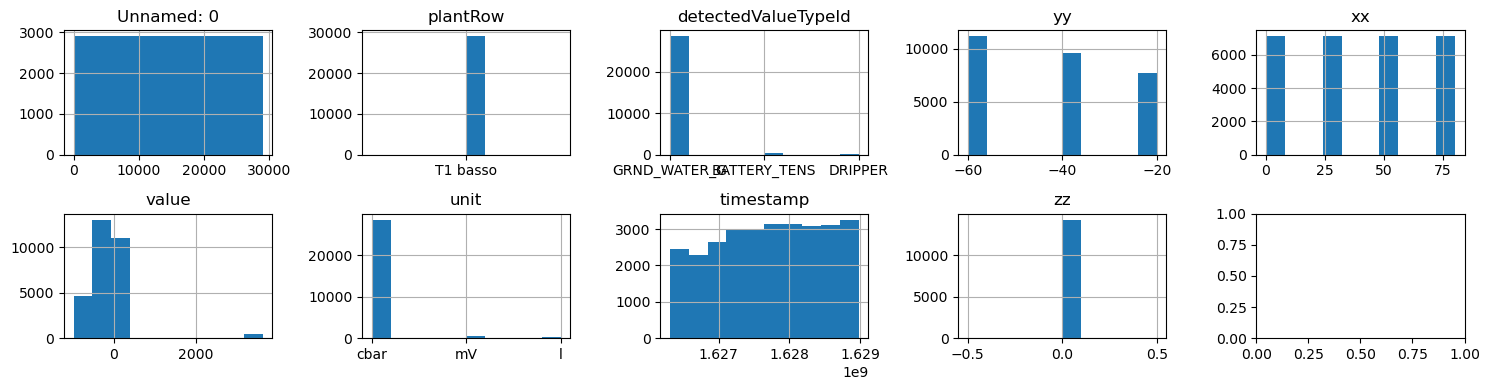

In [7]:
import math
import matplotlib.pyplot as plt

def plot(df, cols = 5):
    rows = math.ceil(len(df.columns) / cols)
    fig, axs = fig, ax = plt.subplots(rows, cols, figsize = (3 * cols, 2 * rows))
    for i, x in enumerate(df.columns):
        ax = axs[int(i / cols)][i % cols]
        df[x].hist(ax=ax)
        ax.set_title(x)
    fig.tight_layout()
plot(df)

#

The `zz` column contains missing values and a single non-null value (`0`), what should we do?

In [8]:
if "zz" in df.columns:
    df = df.drop(columns=["zz"])
df

,Unnamed: 0,plantRow,detectedValueTypeId,yy,xx,value,unit,timestamp
0,0,T1 basso,GRND_WATER_G,-20.0,25.0,-21.616472,cbar,1628951453
1,1,T1 basso,GRND_WATER_G,-20.0,50.0,-113.354793,cbar,1628950550
2,2,T1 basso,GRND_WATER_G,-20.0,0.0,-21.041212,cbar,1628947848
3,3,T1 basso,GRND_WATER_G,-20.0,0.0,-21.328847,cbar,1628948747
4,4,T1 basso,GRND_WATER_G,-20.0,25.0,-130.458021,cbar,1628657108
...,...,...,...,...,...,...,...,...
29059,29059,T1 basso,GRND_WATER_G,-60.0,0.0,-74.186077,cbar,1627102804
29060,29060,T1 basso,GRND_WATER_G,-60.0,25.0,-209.033680,cbar,1627101007
29061,29061,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101905
29062,29062,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101007


#

- Do we need to store the `plantRow`?
- Do the sensors from the same `detectedValueTypeId` share the same `unit`?
- Do we care about all the sensor types (i.e., `detectedValueTypeId`)?

In [9]:
df.groupby(["detectedValueTypeId"]).nunique()

,Unnamed: 0,plantRow,yy,xx,value,unit,timestamp
detectedValueTypeId,,,,,,,
BATTERY_TENS,399,1,0,0,7,1,391
DRIPPER,153,1,0,0,34,1,153
GRND_WATER_G,28512,1,3,4,2362,1,6668


#

Drop the "useless" columns

In [10]:
# What should we drop?
# df = df.drop(["plantRow", "unit"], axis=1)
df

,Unnamed: 0,plantRow,detectedValueTypeId,yy,xx,value,unit,timestamp
0,0,T1 basso,GRND_WATER_G,-20.0,25.0,-21.616472,cbar,1628951453
1,1,T1 basso,GRND_WATER_G,-20.0,50.0,-113.354793,cbar,1628950550
2,2,T1 basso,GRND_WATER_G,-20.0,0.0,-21.041212,cbar,1628947848
3,3,T1 basso,GRND_WATER_G,-20.0,0.0,-21.328847,cbar,1628948747
4,4,T1 basso,GRND_WATER_G,-20.0,25.0,-130.458021,cbar,1628657108
...,...,...,...,...,...,...,...,...
29059,29059,T1 basso,GRND_WATER_G,-60.0,0.0,-74.186077,cbar,1627102804
29060,29060,T1 basso,GRND_WATER_G,-60.0,25.0,-209.033680,cbar,1627101007
29061,29061,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101905
29062,29062,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101007


# 

Drop the useless rows

In [11]:
df = df[df["detectedValueTypeId"] == "GRND_WATER_G"]
df = df.drop(["detectedValueTypeId"], axis=1)
df

,Unnamed: 0,plantRow,yy,xx,value,unit,timestamp
0,0,T1 basso,-20.0,25.0,-21.616472,cbar,1628951453
1,1,T1 basso,-20.0,50.0,-113.354793,cbar,1628950550
2,2,T1 basso,-20.0,0.0,-21.041212,cbar,1628947848
3,3,T1 basso,-20.0,0.0,-21.328847,cbar,1628948747
4,4,T1 basso,-20.0,25.0,-130.458021,cbar,1628657108
...,...,...,...,...,...,...,...
29059,29059,T1 basso,-60.0,0.0,-74.186077,cbar,1627102804
29060,29060,T1 basso,-60.0,25.0,-209.033680,cbar,1627101007
29061,29061,T1 basso,-60.0,50.0,-352.458317,cbar,1627101905
29062,29062,T1 basso,-60.0,50.0,-352.458317,cbar,1627101007


# Sensor data over time

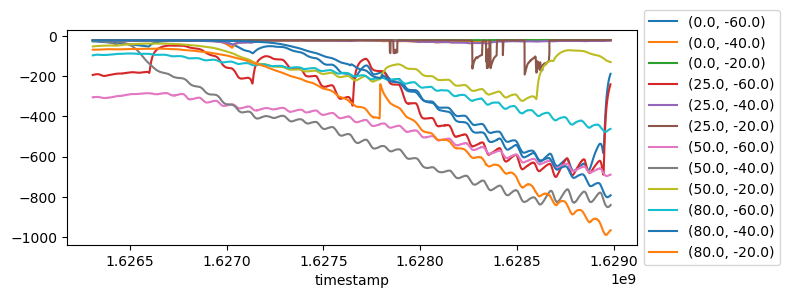

In [12]:
def plot():
    fig, ax = plt.subplots(figsize=(8, 3))
    for key, grp in df.sort_values(by=["timestamp"]).groupby(['xx', 'yy']):
        ax = grp.plot(ax=ax, kind='line', x='timestamp', y='value', label=key)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()
plot()

# Sensor data at different timestamps

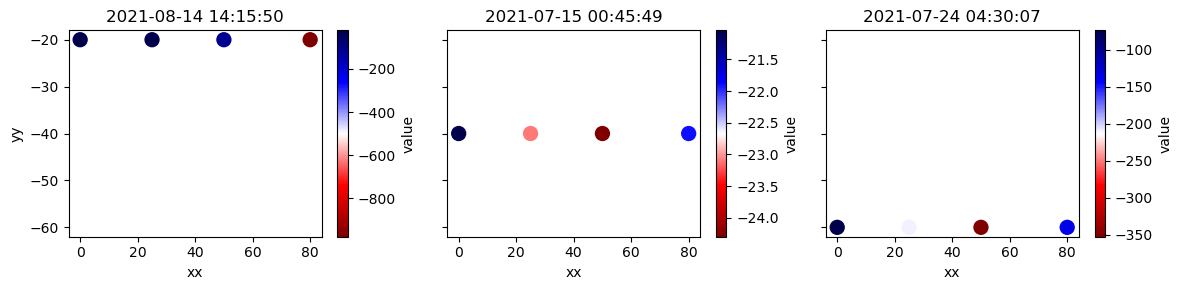

In [13]:
def plot():
    fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
    for i, timestamp in enumerate([1628950550, 1626309949, 1627101007]):
        df[df["timestamp"] == timestamp].plot.scatter(ax=ax[i], x='xx', y='yy', c='value', cmap='seismic_r', s=100, title=pd.to_datetime(timestamp, unit='s').strftime('%Y-%m-%d %H:%M:%S'))
    fig.tight_layout()
plot()

# What if we bin our data hourly?

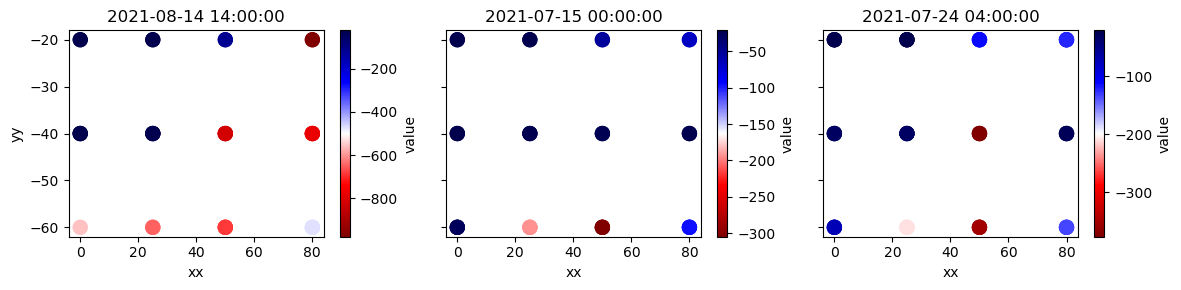

In [14]:
def plot():
    fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
    for i, timestamp in enumerate([1628950550, 1626309949, 1627101007]):
        df[df["timestamp"].apply(lambda x: int(x / (60 * 60))) == int(timestamp / (60 * 60))].plot.scatter(ax=ax[i], x='xx', y='yy', c='value', cmap='seismic_r', s=100, title=pd.to_datetime(int(timestamp / (60 * 60)) * 60 * 60, unit='s').strftime('%Y-%m-%d %H:%M:%S'))
    fig.tight_layout()
plot()

# Data preparation

- Bin data hourly, average the soil moisture for each sensor 
- Create derived attributes (e.g., time/sensor hierarchy) useful for posterior analysis

In [15]:
df["timestamp"] = df["timestamp"].apply(lambda x: int(x / 3600) * 3600)  # bin the time by hours
df1 = df.groupby(["plantRow", "timestamp", "xx", "yy"])["value"].mean().reset_index()  # compute the average humidity
df1["hour"] = [pd.to_datetime(tm, unit='s').strftime('%Y-%m-%d %H') for tm in df1["timestamp"]]  # format the hour
df1["date"] = [pd.to_datetime(tm, unit='s').strftime('%Y-%m-%d') for tm in df1["timestamp"]]  # format the date
df1["month"] = [pd.to_datetime(tm, unit='s').strftime('%Y-%m') for tm in df1["timestamp"]]  # format the month
df1["year"] = [pd.to_datetime(tm, unit='s').strftime('%Y') for tm in df1["timestamp"]]  # format the year
df1["timestamp"] = [pd.to_datetime(tm, unit='s').strftime('%Y-%m-%d %H:%M:%S') for tm in df1["timestamp"]]  # format the timestamp
df1["sensor"] = df1.apply(lambda x: "(" + str(x["xx"]) + ", " + str(x["yy"]) + ")", axis=1)
df2 = df1.rename({"xx": "dist", "yy": "depth", "plantRow": "plant"}, axis=1)
df2

,plant,timestamp,dist,depth,value,hour,date,month,year,sensor
0,T1 basso,2021-07-15 00:00:00,0.0,-60.0,-27.366967,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -60.0)"
1,T1 basso,2021-07-15 00:00:00,0.0,-40.0,-21.041212,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -40.0)"
2,T1 basso,2021-07-15 00:00:00,0.0,-20.0,-21.041212,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -20.0)"
3,T1 basso,2021-07-15 00:00:00,25.0,-60.0,-193.593787,2021-07-15 00,2021-07-15,2021-07,2021,"(25.0, -60.0)"
4,T1 basso,2021-07-15 00:00:00,25.0,-40.0,-23.102383,2021-07-15 00,2021-07-15,2021-07,2021,"(25.0, -40.0)"
...,...,...,...,...,...,...,...,...,...,...
8751,T1 basso,2021-08-14 23:00:00,50.0,-40.0,-840.353649,2021-08-14 23,2021-08-14,2021-08,2021,"(50.0, -40.0)"
8752,T1 basso,2021-08-14 23:00:00,50.0,-20.0,-129.913714,2021-08-14 23,2021-08-14,2021-08,2021,"(50.0, -20.0)"
8753,T1 basso,2021-08-14 23:00:00,80.0,-60.0,-462.190096,2021-08-14 23,2021-08-14,2021-08,2021,"(80.0, -60.0)"
8754,T1 basso,2021-08-14 23:00:00,80.0,-40.0,-791.964873,2021-08-14 23,2021-08-14,2021-08,2021,"(80.0, -40.0)"


# Save the data back to S3.

In [16]:
wr.s3.to_csv(df=df2, path=output_bucket + "cleaned-v2-" + file_name, index=False)

{'paths': ['s3://staging-clean-wateringsensors-12345678/cleaned-v2-watering-data-1661269649253.csv'],
 'partitions_values': {}}

# Checking correlations

In [17]:
pdf = df2[["sensor", "value", "timestamp"]].pivot(index='timestamp', columns='sensor')
pdf.columns = pdf.columns.droplevel(0)
pdf = pdf.reset_index().rename_axis(None, axis=1)
pdf

,timestamp,"(0.0, -20.0)","(0.0, -40.0)","(0.0, -60.0)","(25.0, -20.0)","(25.0, -40.0)","(25.0, -60.0)","(50.0, -20.0)","(50.0, -40.0)","(50.0, -60.0)","(80.0, -20.0)","(80.0, -40.0)","(80.0, -60.0)"
0,2021-07-15 00:00:00,-21.041212,-21.041212,-27.366967,-21.616472,-23.102383,-193.593787,-52.528144,-24.204667,-304.915914,-68.562192,-22.095825,-96.347607
1,2021-07-15 01:00:00,-21.041212,-21.041212,-27.534631,-21.760280,-23.102383,-192.983111,-52.026595,-24.412328,-304.637871,-68.562192,-21.904088,-95.634768
2,2021-07-15 02:00:00,-21.041212,-21.041212,-27.702294,-22.047891,-23.102383,-192.125734,-51.692214,-24.635959,-303.989075,-68.562192,-21.904088,-95.028808
3,2021-07-15 03:00:00,-21.041212,-21.041212,-27.702294,-21.904088,-23.102383,-191.636330,-51.190619,-24.635959,-303.649208,-68.228455,-21.904088,-94.616890
4,2021-07-15 04:00:00,-21.041212,-21.041212,-27.989708,-21.616472,-23.102383,-190.739660,-50.903980,-24.923474,-303.154831,-68.228455,-21.904088,-93.876178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2021-08-14 19:00:00,-20.753568,-22.191694,-256.039903,-21.041212,-23.725431,-306.917177,-125.565894,-850.129532,-695.245247,-981.683056,-800.636272,-470.650216
740,2021-08-14 20:00:00,-20.753568,-21.975989,-232.675216,-21.041212,-23.557690,-285.590873,-126.599786,-849.870933,-693.901787,-977.351484,-799.489618,-467.938392
741,2021-08-14 21:00:00,-20.753568,-21.904088,-214.867884,-21.041212,-23.389949,-268.375038,-127.830821,-847.995784,-692.062365,-973.500444,-797.590173,-465.339106
742,2021-08-14 22:00:00,-20.753568,-21.904088,-201.340064,-21.041212,-23.389949,-254.095873,-129.053794,-845.106682,-690.134413,-968.902449,-795.092987,-463.250007


#

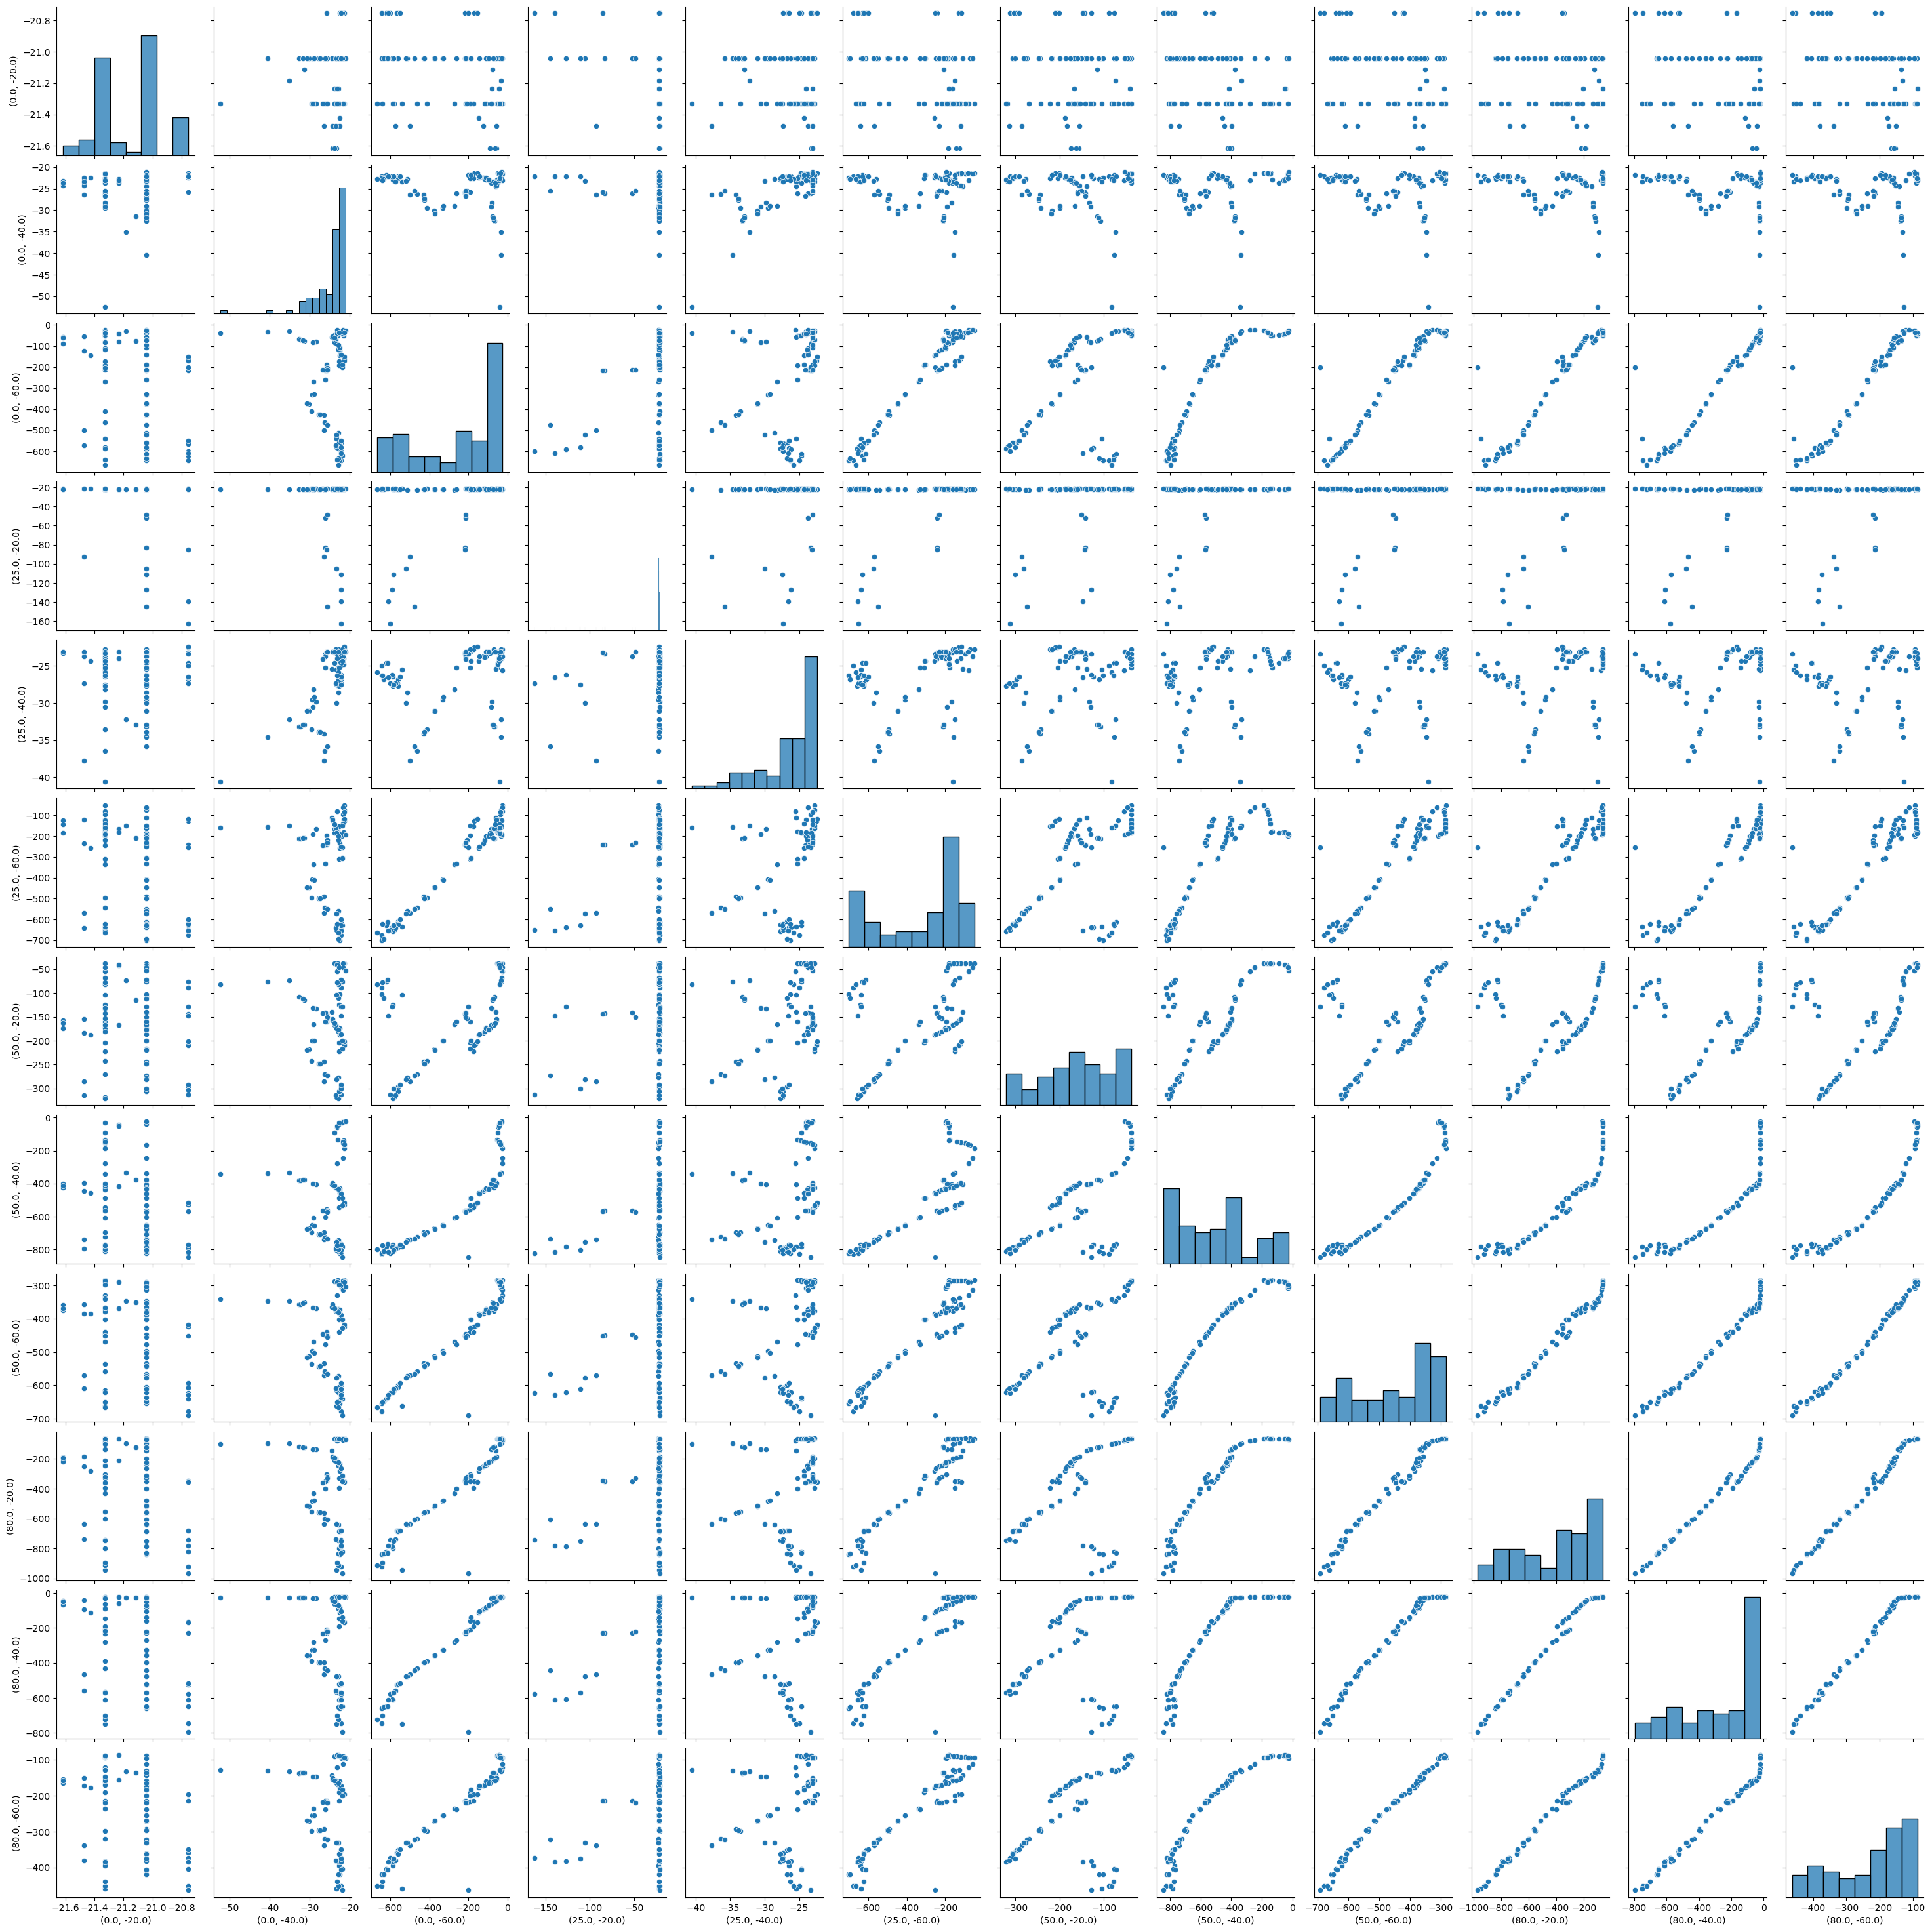

In [18]:
import seaborn as sns
sns.pairplot(pdf.sample(100))

# 4. Build a (relational) data warehouse (AWS RDS)

Amazon Relational Database Service (Amazon RDS) 

- A collection of managed services that makes it simple to set up, operate, and scale relational databases in the cloud


![RDS](https://user-images.githubusercontent.com/18005592/200369753-f6d9e73e-6d7f-4d4b-bad6-311528e51629.png)

# Create a database

:::: {.columns}

::: {.column width=33%}

![Version of the database](img/aws-rds.png)

:::
::: {.column width=33%}

![Configuration](img/aws-rds2.png)

:::
::: {.column width=33%}

![Public Access](img/aws-rds3.png)

:::
::::

In [19]:
pwd = "bigdata2023"

# Create a database

By default, even if you have set "Public accessibility" to "Yes", the "Security Group" is still not allowing external connections yet.

- Virtual private clouds (VPC): a VPC is a virtual network that closely resembles a traditional network that you'd operate in your own data center
- A security group acts as a virtual firewall for your AWS instances to control incoming/outgoing traffic
    - When you launch an instance, you can specify one or more security groups
    - If you don't specify a security group, Amazon EC2 uses the default security group
- Your AWS account automatically has a default security group for the default VPC in each Region

# Create a database

From [Default security groups (2022-11-15)](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/default-custom-security-groups.html#default-security-group)

![Inbound/Outbound rules](https://user-images.githubusercontent.com/18005592/201981163-0bd75761-be85-41ea-aaf9-6af66e3e41ac.png)


# Create a database

You can add or remove inbound and outbound rules for any default security group.

![Changing the Security Group](https://user-images.githubusercontent.com/18005592/201690868-abdd53f7-c6b5-48d4-89ce-e9f6f374a8ce.png)


# Create a database

![Edit the inbound rules](https://user-images.githubusercontent.com/18005592/201691253-db130df8-c31a-4c6f-aa69-34cf4d89f0e2.png)

# Create a database

![Allow inbound address from anywhere](https://user-images.githubusercontent.com/18005592/201691398-a16f467e-c6cd-4dd9-8fc3-f31b45740ec4.png)

# Create a database

What is the schema of our dataset?

In [20]:
df2.columns

Index(['plant', 'timestamp', 'dist', 'depth', 'value', 'hour', 'date', 'month',
       'year', 'sensor'],
      dtype='object')

In [21]:
raw_data = wr.s3.read_csv(output_bucket + "cleaned-v2-" + file_name)
raw_data

,plant,timestamp,dist,depth,value,hour,date,month,year,sensor
0,T1 basso,2021-07-15 00:00:00,0.0,-60.0,-27.366967,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -60.0)"
1,T1 basso,2021-07-15 00:00:00,0.0,-40.0,-21.041212,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -40.0)"
2,T1 basso,2021-07-15 00:00:00,0.0,-20.0,-21.041212,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -20.0)"
3,T1 basso,2021-07-15 00:00:00,25.0,-60.0,-193.593787,2021-07-15 00,2021-07-15,2021-07,2021,"(25.0, -60.0)"
4,T1 basso,2021-07-15 00:00:00,25.0,-40.0,-23.102383,2021-07-15 00,2021-07-15,2021-07,2021,"(25.0, -40.0)"
...,...,...,...,...,...,...,...,...,...,...
8751,T1 basso,2021-08-14 23:00:00,50.0,-40.0,-840.353649,2021-08-14 23,2021-08-14,2021-08,2021,"(50.0, -40.0)"
8752,T1 basso,2021-08-14 23:00:00,50.0,-20.0,-129.913714,2021-08-14 23,2021-08-14,2021-08,2021,"(50.0, -20.0)"
8753,T1 basso,2021-08-14 23:00:00,80.0,-60.0,-462.190096,2021-08-14 23,2021-08-14,2021-08,2021,"(80.0, -60.0)"
8754,T1 basso,2021-08-14 23:00:00,80.0,-40.0,-791.964873,2021-08-14 23,2021-08-14,2021-08,2021,"(80.0, -40.0)"


- Is this schema normalized?
- Is this the schema you are used to when building DWH?

# Creating the DWH

We need to distinguish the fact and the dimension tables:

- FT: Measurement
- DT1: Time
- DT2: Sensor

How?

# DT Time

In [22]:
dt_time = raw_data[["timestamp", "date", "month", "year"]].drop_duplicates()
dt_time

,timestamp,date,month,year
0,2021-07-15 00:00:00,2021-07-15,2021-07,2021
12,2021-07-15 01:00:00,2021-07-15,2021-07,2021
24,2021-07-15 02:00:00,2021-07-15,2021-07,2021
36,2021-07-15 03:00:00,2021-07-15,2021-07,2021
48,2021-07-15 04:00:00,2021-07-15,2021-07,2021
...,...,...,...,...
8696,2021-08-14 19:00:00,2021-08-14,2021-08,2021
8708,2021-08-14 20:00:00,2021-08-14,2021-08,2021
8720,2021-08-14 21:00:00,2021-08-14,2021-08,2021
8732,2021-08-14 22:00:00,2021-08-14,2021-08,2021


# DT Sensor

In [23]:
dt_sensor = raw_data[["sensor", "dist", "depth", "plant"]].drop_duplicates()
dt_sensor

,sensor,dist,depth,plant
0,"(0.0, -60.0)",0.0,-60.0,T1 basso
1,"(0.0, -40.0)",0.0,-40.0,T1 basso
2,"(0.0, -20.0)",0.0,-20.0,T1 basso
3,"(25.0, -60.0)",25.0,-60.0,T1 basso
4,"(25.0, -40.0)",25.0,-40.0,T1 basso
5,"(25.0, -20.0)",25.0,-20.0,T1 basso
6,"(50.0, -60.0)",50.0,-60.0,T1 basso
7,"(50.0, -40.0)",50.0,-40.0,T1 basso
8,"(50.0, -20.0)",50.0,-20.0,T1 basso
9,"(80.0, -60.0)",80.0,-60.0,T1 basso


# FT measurement

In [24]:
ft_mea = raw_data[["sensor", "timestamp", "value"]].drop_duplicates()
ft_mea

,sensor,timestamp,value
0,"(0.0, -60.0)",2021-07-15 00:00:00,-27.366967
1,"(0.0, -40.0)",2021-07-15 00:00:00,-21.041212
2,"(0.0, -20.0)",2021-07-15 00:00:00,-21.041212
3,"(25.0, -60.0)",2021-07-15 00:00:00,-193.593787
4,"(25.0, -40.0)",2021-07-15 00:00:00,-23.102383
...,...,...,...
8751,"(50.0, -40.0)",2021-08-14 23:00:00,-840.353649
8752,"(50.0, -20.0)",2021-08-14 23:00:00,-129.913714
8753,"(80.0, -60.0)",2021-08-14 23:00:00,-462.190096
8754,"(80.0, -40.0)",2021-08-14 23:00:00,-791.964873


# 

We need to connect to the database...

![Check `Connectivity & Security`](https://user-images.githubusercontent.com/18005592/200372868-4881edde-4f7f-4024-8ffb-cc3836d1a367.png)

In [25]:
#| echo: false
#| output: false

# host = "sensor-dwh2.cpqeoiowah7l.us-east-1.rds.amazonaws.com"
# PostgresSQL
# port = 5432
# user = "postgres"
# db = "postgres"
# s = 'postgresql://{}:{}@{}:{}/{}'.format(user, pwd, host, str(port), db)
# from sqlalchemy import create_engine, text
# s = s.format(user, pwd, host, str(port), db)
# engine = create_engine(s, connect_args={'autocommit': True})

In [26]:
from sqlalchemy import create_engine, text
host, port = "database-3.crefbdkmwp4g.us-east-1.rds.amazonaws.com", 1433
user, db = "admin", "master"
s = 'mssql+pymssql://{}:{}@{}:{}/{}'.format(user, pwd, host, str(port), db)
engine = create_engine(s, connect_args={'autocommit': True})
try:
    with engine.connect() as conn:
        conn.execute(text("CREATE DATABASE mydb"))
except Exception as e: print(e)
db = "mydb"
engine = create_engine('mssql+pymssql://{}:{}@{}:{}/{}'.format(user, pwd, host, str(port), db), connect_args={'autocommit': True})

(pymssql.exceptions.OperationalError) (1801, b"Database 'mydb' already exists. Choose a different database name.DB-Lib error message 20018, severity 16:\nGeneral SQL Server error: Check messages from the SQL Server\n")
[SQL: CREATE DATABASE mydb]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#

... and create/fill the tables

In [27]:
dt_sensor.to_sql('sensor', engine, index=False, if_exists='replace')

12

In [28]:
dt_time.to_sql('date', engine, index=False, if_exists='replace')

220

In [ ]:
ft_mea.to_sql('measurement', engine, index=False, if_exists='replace')

# 5. Query the Data Warehouse (PowerBI)

:::: {.columns}
::: {.column width=35%}

![1. Select data origin](https://private-user-images.githubusercontent.com/18005592/512313647-ba573072-f0ff-46fc-a580-d448daef8aab.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTgwMjIsIm5iZiI6MTc2Mjc5NzcyMiwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTM2NDctYmE1NzMwNzItZjBmZi00NmZjLWE1ODAtZDQ0OGRhZWY4YWFiLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDIwMlomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTc0YmYyNjMyMTZjOGUyZjJhZTgzN2JiNzg1Y2M4N2JkMWE1NDQ2ZjEzY2I3YTU4NzJkN2EzMDBmNmEyZDQzOGUmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.MyWWrBCK4LroQfCMhO7c5KZJ6ADvBXP4L4_pklGsZZQ)

![2. Select SQL Server](https://private-user-images.githubusercontent.com/18005592/512313665-28c91490-5061-41d6-b34f-35266f921cd2.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTgwMjIsIm5iZiI6MTc2Mjc5NzcyMiwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTM2NjUtMjhjOTE0OTAtNTA2MS00MWQ2LWIzNGYtMzUyNjZmOTIxY2QyLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDIwMlomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPWQ3M2Q4YzQzMzkxNjhkOGI5NGRmYTY0MjZiN2Y0YTY0ZTYwYTdlZTQ4YjM1MDVmNWE2YmZkN2IwMDRhYzU3YTUmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.GBBbJhny5hmEky2FOF0Gx36AmA-3RD-umkPJqUoQEdQ)

![3. Set up the server name](https://private-user-images.githubusercontent.com/18005592/512313675-84343503-b8ea-4612-8b63-9116c64e1582.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTgwMjIsIm5iZiI6MTc2Mjc5NzcyMiwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTM2NzUtODQzNDM1MDMtYjhlYS00NjEyLThiNjMtOTExNmM2NGUxNTgyLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDIwMlomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTM3NDQ1M2EyNzYxOWI4NGViYWIwODJjNzZhZmI0NTI2M2I1MDFiN2MyZDc2YWE2ZGM1NzQ1NTc3MjcxMzE2ODgmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.X5Ljo_9ao_i5HqUsm_dR4kHXRDPYkUphV2Bit0XRr3M)


:::
::: {.column width=35%}

![4. Choose the right authentication](https://private-user-images.githubusercontent.com/18005592/512313689-2396998b-25fd-4c7b-9cfe-3fd5b2aa6bf0.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTgwMjIsIm5iZiI6MTc2Mjc5NzcyMiwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTM2ODktMjM5Njk5OGItMjVmZC00YzdiLTljZmUtM2ZkNWIyYWE2YmYwLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDIwMlomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTI0YjMyYTQ4ZDk5MzE0NWJjMDc3MzUyOTExZGMwOGZmNDQ2NmQwNDdkZDdlOGU2MjkzMmIyNWRhODcxZmIyZjYmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.QSJx-KlRiMbETKFkfvF1jfcL3MPG_oeeCHAPu2KHUBM)

![5. Accept unencrypted data](https://private-user-images.githubusercontent.com/18005592/512313711-d8ecb2dd-2c70-409b-a84d-74294950935d.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTgwMjIsIm5iZiI6MTc2Mjc5NzcyMiwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTM3MTEtZDhlY2IyZGQtMmM3MC00MDliLWE4NGQtNzQyOTQ5NTA5MzVkLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDIwMlomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPWFiYjk1OWRiYjhkNWJiOTc5NDJjMzVjNTBjOGM5YzUwNzA3YWM5YjlkNmMzZmYxODI4M2ZhZDkxZGFiODYxMmEmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.b1sQZXxYq8whnFQWgXWzL-D5HlqPTEqkoOMTkDigEvw)

:::
::: {.column width=30%}

![6. Load data](https://private-user-images.githubusercontent.com/18005592/512313724-16b40dcb-9507-4fe7-80fd-8d17b1899696.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NjI3OTgwMjIsIm5iZiI6MTc2Mjc5NzcyMiwicGF0aCI6Ii8xODAwNTU5Mi81MTIzMTM3MjQtMTZiNDBkY2ItOTUwNy00ZmU3LTgwZmQtOGQxN2IxODk5Njk2LnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNTExMTAlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUxMTEwVDE4MDIwMlomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPTUwYTRmNTc1ZTJiNGFkMWUxYjRlYmFhZjJmMWRhYzUyOGUzY2FmOGM3MTE0OTAzNTE5NmM4ZDcxM2MzOTc2MjQmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.ypmTh8WC7-nlWU6crYRY_wijwDCzBIWIIV7chxK6suU)

:::
::::

# Tasks

1. Build the hierarchies by following the functional dependencies
2. Plot the average soil moisture (`avg(value)`) by `sensor` and `date`. Is soil moisture behaving as expected for all sensors?
3. Plot the standard deviation of the soil moisture for every sensor. What can you tell from this visualization?

# Complete configuration tutorial

{{< video https://youtu.be/xUvg5r6139c title="Configuration tutorial" aspect-ratio="16x9" width="800" height="450" >}}

# Alternative to SQL Server: Create a Database (PostgreSQL)

:::: {.columns}

::: {.column width=33%}

![image](https://github.com/w4bo/welaser/assets/18005592/ec3cdca6-548f-4370-95ca-107fcbb215ed)

:::
::: {.column width=33%}

![image](https://user-images.githubusercontent.com/18005592/200370529-ae695d6f-9629-49bb-ae13-a4f5caeb9a0d.png)


:::
::: {.column width=33%}

![image](https://user-images.githubusercontent.com/18005592/200373378-f257ef56-aea9-4eb3-a922-2a4a3b2a1d11.png)

:::

::::

# Alternative to PowerBI: Query the data warehouse (Tableau)

![image](https://user-images.githubusercontent.com/18005592/200375443-c023c9f7-6df4-4717-91a6-4d9ea230eaea.png)